In [4]:
# Data analysis and visualisation to understand the
# relationship of revenue with other factors

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv("tmdb-movies.csv")
np.random.seed(0)

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
movies.shape

(10866, 21)

In [7]:
type(movies)

pandas.core.frame.DataFrame

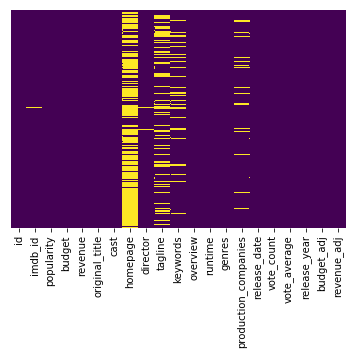

In [8]:
#use heat map to check for missing values
sns.heatmap(movies.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Clearly a homepage, tagline and keywords have a lot of elements missing

In [9]:
#looking for how many movies have NaN imdb_id along with otherr missing values
movies[movies['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


Since all the results also have missing budget and revenue we can drop them later

In [10]:
#Checking for correlation in the data
movies.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


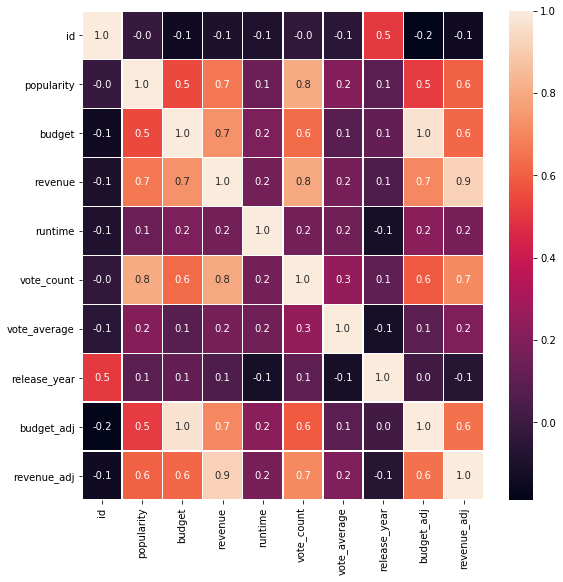

In [11]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(movies.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

There seems to be some association between 
1.revenue and popularity 
2.popularity and vote count
3.revenue and vote count 
4.revenue and budget. 
Surprisingly there seems to be no relationship between revenue and avg_vote.

We need to remove redundant columns. Since Revenue and revenue_adj have in effect the same data we we need to chose which column is more accurate. 

In [12]:
# checking for unrealistic values like very low revenue or budget
movies.groupby('revenue').count()

,id,imdb_id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
revenue,,,,,,,,,,,,,,,,,,,,
0,6016,6006,6016,6016,6016,5945,1271,5973,3656,4758,6012,6016,5993,5082,6016,6016,6016,6016,6016,6016
2,2,2,2,2,2,2,0,2,1,1,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,1,3,3,3,3,3,3,2,3,3,3,3,3,3
5,2,2,2,2,2,2,0,2,0,1,2,2,2,2,2,2,2,2,2,2
6,2,2,2,2,2,2,0,2,1,2,2,2,2,2,2,2,2,2,2,2
9,2,2,2,2,2,2,1,2,1,1,2,2,2,1,2,2,2,2,2,2
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11,3,3,3,3,3,3,1,3,1,2,3,3,3,3,3,3,3,3,3,3
12,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


C:\Users\rebec\Documents\Naresh Data\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



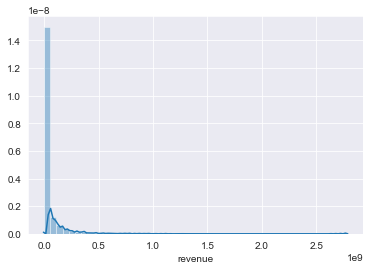

In [13]:
sns.set_style('darkgrid')
sns.distplot(movies['revenue'])
#Kde histogram to see the impact of 0 values on the overall data

revenue column has some unrealisticly low values.
6016 movies have made 0 dollors.
Other movies have made 1 to a few hundred dollars, which seems unlikely.

In [14]:
movies.groupby('budget').count()

,id,imdb_id,popularity,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,,,,,,,,,,,,,,,,,,,,
0,5696,5687,5696,5696,5696,5631,1229,5656,3488,4534,5692,5696,5674,4802,5696,5696,5696,5696,5696,5696
1,4,4,4,4,4,4,3,4,3,4,4,4,4,4,4,4,4,4,4,4
2,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,1,3,3,2,3,3,3,3,3,3,3,3,3,3
5,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
8,3,3,3,3,3,3,1,3,2,3,3,3,3,3,3,3,3,3,3,3
10,6,6,6,6,6,6,2,6,3,4,6,6,6,5,6,6,6,6,6,6
11,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1


In [15]:
movies.groupby('revenue_adj').count()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,,,,,,,,,,,
0.000000e+00,6016,6006,6016,6016,6016,6016,5945,1271,5973,3656,4758,6012,6016,5993,5082,6016,6016,6016,6016,6016
2.370705e+00,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1
2.861934e+00,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
3.038360e+00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
5.926763e+00,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1
6.951084e+00,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
8.585801e+00,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
9.056820e+00,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
9.115080e+00,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1


revenue_adj has the same problem of incerdebly low revenues and budgets. These low values left skew our data. We can try looking at the year of movies, to see if old movies are messing with out data and focus our analysis within a particular time frame.

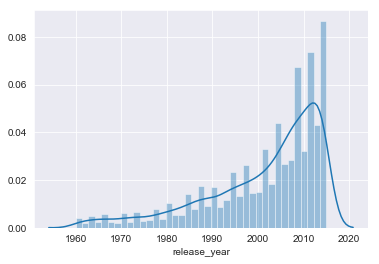

In [16]:
sns.set_style('darkgrid')
sns.distplot(movies['release_year'])

Lets start by removing all the 0 budget movies. Hopefully this will also remove most of the 0 budget movies

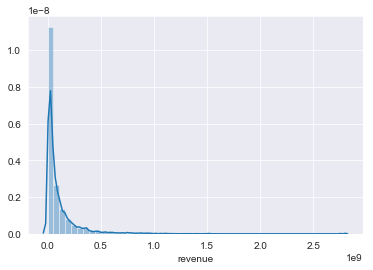

In [17]:
#Droppong 0 revenue movies

#df = df.drop(df[df.score<50].index), messed up turned dataframe into None object
#df = df[(df[['A','C']] != 0).all(axis=1)], error list doesnt have attribute all
#df[df.name != 'Tina']
movies = movies[movies['revenue']!=0]
sns.set_style('darkgrid')
sns.distplot(movies['revenue'])

There are still some unrealistically low values which will skew our analysis. Also as these movies data back to 1960's so unless we can account for inflation we will not get a very accurate analysis.

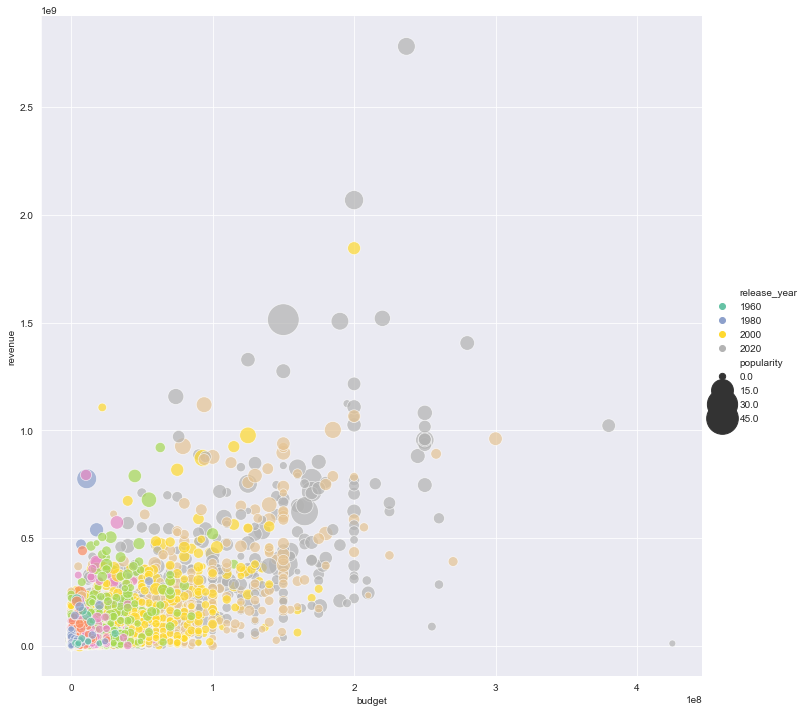

In [18]:
sns.relplot(x="budget", y="revenue", data= movies, size ="popularity", hue = 'release_year', palette = 'Set2',alpha=.7,sizes=(40,1000),height=10)

From the above graph we see that movies from 1960 and 1980 have very low budgets and revenue. As wee cuurently dont want to deal with inflation we can focus only on movies from the 2000 to present.

In [19]:
movies.shape

(4850, 21)

In [20]:
#df.groupby(df.index.year).sum().head()
#df.groupby(['Animal']).mean()
movies1 = movies.groupby(['release_year']).count()
movies1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,,,,,,
1960,7,7,7,7,7,7,7,0,7,6,6,7,7,7,7,7,7,7,7,7
1961,10,10,10,10,10,10,10,1,10,9,10,10,10,10,10,10,10,10,10,10
1962,9,9,9,9,9,9,9,1,9,9,9,9,9,9,9,9,9,9,9,9
1963,7,7,7,7,7,7,7,1,7,7,7,7,7,7,7,7,7,7,7,7
1964,8,8,8,8,8,8,8,2,8,8,8,8,8,8,8,8,8,8,8,8
1965,5,5,5,5,5,5,5,1,5,4,5,5,5,5,5,5,5,5,5,5
1966,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5
1967,14,14,14,14,14,14,14,1,14,12,14,14,14,14,14,14,14,14,14,14
1968,12,12,12,12,12,12,12,0,12,12,12,12,12,12,12,12,12,12,12,12


Two thirds of our movies are concentrared in the 2000's and 2010's. we can concentrate on these years to get a more accurate picture.

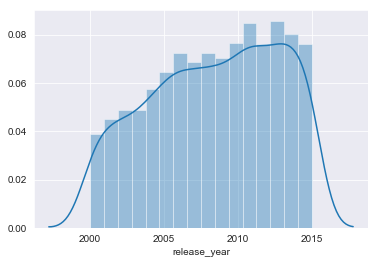

In [21]:
movies2 = movies[movies['release_year']>= 2000]
sns.set_style('darkgrid')
sns.distplot(movies2['release_year'])

In [22]:
# This is a more uniform dataset
movies2.shape

(3035, 21)

# Data Cleaning

In [23]:
# Removing columns which are not needed
#movies1 = movies.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'homepage','tagline', 'overview','keywords'], axis = 1)

#Lets look for outliers
movies2.groupby('budget').count()

,id,imdb_id,popularity,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,,,,,,,,,,,,,,,,,,,,
0,534,534,534,534,534,533,229,534,400,460,534,534,534,490,534,534,534,534,534,534
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,2,2,2,2,2,2,1,2,0,1,2,2,2,2,2,2,2,2,2,2
15,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
20,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
25,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
68,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


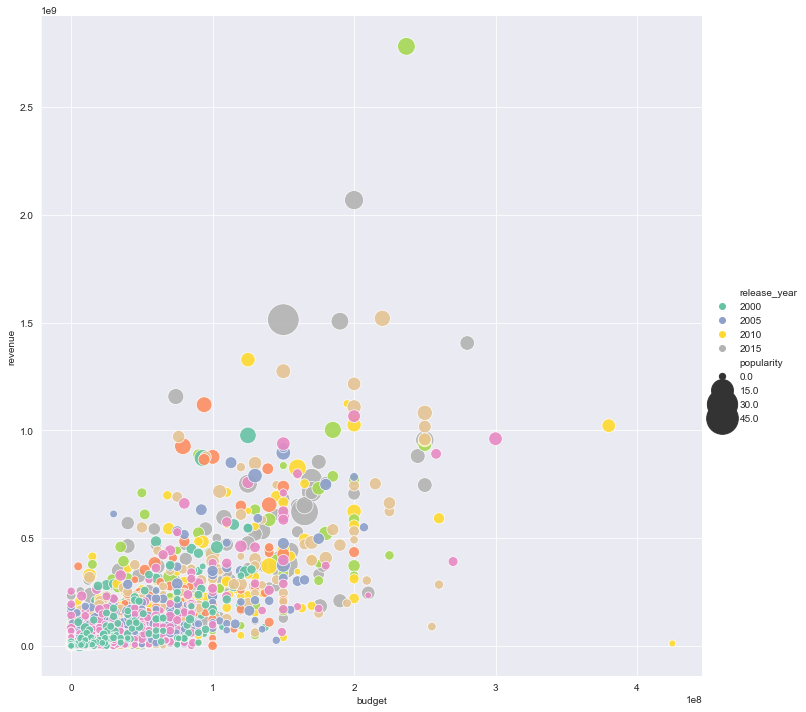

In [24]:
sns.relplot(x="budget", y="revenue", data= movies2, size ="popularity", hue = 'release_year', palette = 'Set2',alpha=.9,sizes=(40,1000),height=10)

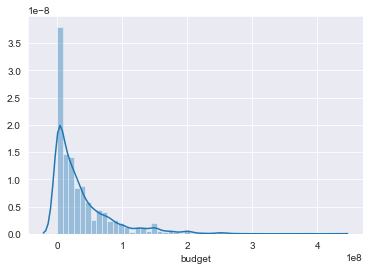

In [25]:
# checking the budget to see distribution
sns.set_style('darkgrid')
sns.distplot(movies2['budget'])

I dont understand how a 0 budget movie can be made. So we decide on a cut off of a 100k dollars as the minimum budget of the movies.

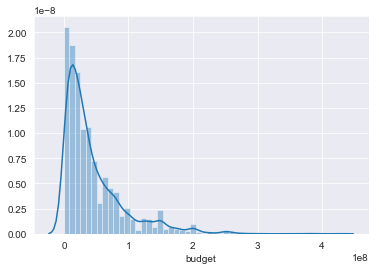

In [26]:
movies3 = movies2[movies2['budget']>= 100000]
sns.set_style('darkgrid')
sns.distplot(movies3['budget'])

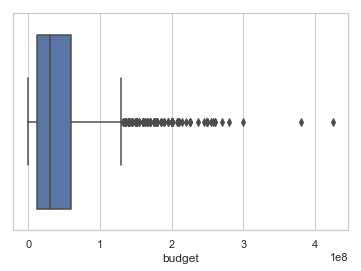

In [27]:
sns.set(style="whitegrid")

ax = sns.boxplot(x=movies3["budget"])

In [28]:
#checking the higest revenue movies, creating a sorted dataframe by 
movies_sorted_revenue = movies3.sort_values('revenue', ascending=False)
movies_sorted_revenue.head(30)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09


Transformers: Dark of the Moon, has a very low popularity for such a high grossing movie. I will assume the is a data entry error since moving the decimal one point would make the popularity more accurate.

In [29]:
movies_sorted_budget = movies3.sort_values('budget', ascending=False)
movies_sorted_budget.head(30)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07
4363,49026,tt1345836,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,http://www.thedarkknightrises.com/,Christopher Nolan,The Legend Ends,...,Following the death of District Attorney Harve...,165,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,7/16/12,67

The highest budget movie according to our data set is The Warriors Way with a budget of 425 million dollars. This movie only made 11 million dollars. This data is not accurate and in actuallity The warriors way only costed 42 million to make. So we need to correct this data also.

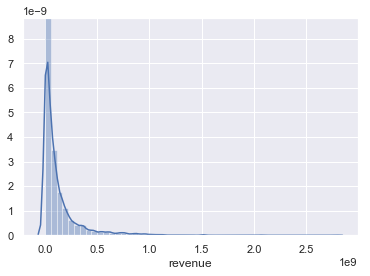

In [30]:
movies4 = movies3[movies3['revenue']>= 100000]
sns.set_style('darkgrid')
sns.distplot(movies4['revenue'])

In [31]:
movies4.shape

(2411, 21)

In [32]:
movies3.shape

(2477, 21)

In [33]:
# get the number of missing data points per column
missing_values_count = movies4.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       1
homepage                1178
director                   1
tagline                  173
keywords                 100
overview                   0
runtime                    0
genres                     0
production_companies      28
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We dont plan to use homepage, tagline, keywords. It may be interesting to use production_companines, we can fill this as other. As there is only one director and cast missing we can fill this manually.

In [34]:
#df.fillna(0)
movies4['production_companies'].fillna('other')
missing_values_count = movies4.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       1
homepage                1178
director                   1
tagline                  173
keywords                 100
overview                   0
runtime                    0
genres                     0
production_companies      28
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [35]:
# looking for the data without cast aand director
movies4[movies4['cast'].isnull()]
# this movie didnt have a cast sine this is a documentary

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4889,126509,tt2247692,0.075043,2500000,33400000,2016: Obama's America,NaN,http://2016themovie.com/,Dinesh D'Souza|John Sullivan,"Love Him, Hate Him, You Don't Know Him",...,2016: Obama's America takes audiences on a gri...,87,Documentary,NaN,7/13/12,11,4.7,2012,2.374361e+06,3.172146e+07


In [36]:
movies4[movies4['director'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3276,15467,tt1105733,0.147657,4180000,11000000,Kismat Konnection,Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...,http://www.kismatkonnection.tips.in/,NaN,NaN,...,This is a story about an architect Raj Malhotr...,153,Drama|Comedy|Romance|Foreign,Tips Industries,7/18/08,11,5.8,2008,4.233448e+06,1.114065e+07


In [37]:
movies4.sample(40)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3400,37686,tt1650062,2.026717,50000000,260095987,Super 8,Joel Courtney|Elle Fanning|Riley Griffiths|Kyl...,http://www.super8-movie.com/,J.J. Abrams,It Arrives.,...,"In 1979 Ohio, several youngsters are making a ...",112,Thriller|Science Fiction|Mystery,Paramount Pictures|Amblin Entertainment|Bad Ro...,6/8/11,1527,6.6,2011,4.846990e+07,2.521365e+08
7429,1562,tt0463854,1.368087,15000000,64238440,28 Weeks Later,Imogen Poots|Robert Carlyle|Rose Byrne|Jeremy ...,NaN,Juan Carlos Fresnadillo,When days turn to weeks... the horror returns.,...,"In this chilling sequel to 28 Days Later, the ...",100,Horror|Thriller|Science Fiction,DNA Films|Figment Films|Sociedad General de Ci...,4/26/07,702,6.3,2007,1.577503e+07,6.755755e+07
287,266639,tt3614530,0.435582,5000000,2333684,Jem and the Holograms,Aubrey Peeples|Stefanie Scott|Aurora Perrineau...,http://jemthemovie.com/,Jon M. Chu,Every Generation Needs a Voice.,...,"In a hyper-linked social media age, an orphane...",119,Drama|Music|Adventure|Fantasy,Universal Pictures|Blumhouse Productions|Hasbr...,10/22/15,69,5.7,2015,4.599998e+06,2.146988e+06
6563,1422,tt0407887,2.819750,90000000,289847354,The Departed,Leonardo DiCaprio|Matt Damon|Jack Nicholson|Ma...,http://thedeparted.warnerbros.com/,Martin Scorsese,Lies. Betrayal. Sacrifice. How far will you ta...,...,"To take down South Boston's Irish Mafia, the p...",151,Drama|Thriller|Crime,Vertigo Entertainment|Media Asia Films|Warner ...,10/5/06,2635,7.7,2006,9.735022e+07,3.135189e+08
3419,50348,tt1189340,1.482692,40000000,85412898,The Lincoln Lawyer,Matthew McConaughey|Marisa Tomei|Ryan Phillipp...,http://www.thelincolnlawyermovie.com/,Brad Furman,This Case is a Dangerous Game of Life and Death,...,A lawyer conducts business from the back of hi...,119,Crime|Drama|Thriller,Lakeshore Entertainment|Sidney Kimmel Entertai...,3/17/11,582,6.9,2011,3.877592e+07,8.279910e+07
2639,808,tt0126029,2.918566,60000000,484409218,Shrek,Mike Myers|Eddie Murphy|Cameron Diaz|John Lith...,http://www.shrek.com/,Andrew Adamson|Vicky Jenson,The greatest fairy tale never told.,...,It ain't easy bein' green -- especially if you...,90,Adventure|Animation|Comedy|Family|Fantasy,DreamWorks SKG|Pacific Data Images (PDI)|Dream...,5/16/01,2284,7.1,2001,7.388929e+07,5.965442e+08
690,195589,tt2004420,2.376309,18000000,268157400,Neighbors,Seth Rogen|Zac Efron|Rose Byrne|Dave Franco|Ik...,NaN,Nicholas Stoller,Family vs. Frat,...,A couple with a newborn baby face unexpected d...,96,Comedy,Universal Pictures|Point Grey Pictures|Good Un...,5/8/14,1829,6.2,2014,1.657964e+07,2.469974e+08
1474,18320,tt0962736,0.894268,35000000,27409889,The Young Victoria,Emily Blunt|Jim Broadbent|Mark Strong|Paul Bet...,http://www.theyoungvictoriamovie.com/,Jean-Marc VallÃ©e,Love rules all,...,From Academy AwardÂ® winners Graham King and M...,105,Drama|History|Romance,GK Films,3/4/09,201,6.9,2009,3.557402e+07,2.785942e+07
3420,71676,tt1071875,1.481016,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,http://www.thespiritofvengeance.com/,Mark Neveldine|Brian Taylor,He Rides Again.,...,When the devil resurfaces with aims to take ov...,95,Action|Fantasy|Thriller,Columbia Pictures|Imagenation Abu Dhabi FZ|Mar...,12/10/11,752,4.7,2011,5.525569e+07,1.446510e+08
5518,109443,tt1229340,1.108437,50000000,173649015,Anchorman 2: The Legend Continues,Will Ferrell|Steve Carell|Paul Rudd|Christina ...,NaN,Adam McKay,It's kind of a big deal,...,"With the 70s behind him, San Diego's top rated...",119,Comedy,Paramount Pictures|Gary Sanchez Productions|Ap...,12/18/13,639,6.0,2013,4.680167e+07,1.625413e+08


In [38]:
# From looking at the data set we can assume that the genre is the
#first word of the list
# We can remove the rest of the words

#genres_list = movies4['genres'].str.split('|')
#data["Team"]= data["Team"].str.split("t", n = 1, expand = True)
movies4['genres'] = movies4['genres'].str.split('|', n=0, expand = True)

movies4.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7502,7737,tt0432021,0.665367,45000000,147717833,Resident Evil: Extinction,Milla Jovovich|Oded Fehr|Ali Larter|Iain Glen|...,http://www.sonypictures.com/movies/residentevi...,Russell Mulcahy,The Extinction Is Coming...,...,"Years after the Racoon City catastrophe, survi...",94,Horror,Impact Pictures|Davis-Films|Constantin Film Pr...,9/20/07,789,6.0,2007,4.732509e+07,1.553502e+08
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,A suburban family is torn apart when fourteen-...,104,Crime,Nu Image Films|Millennium Films|Dark Harbor St...,4/1/11,164,6.5,2011,9.209281e+06,1.163278e+05
5537,68179,tt0765446,1.002527,40000000,74597643,Escape from Planet Earth,Brendan Fraser|Rob Corddry|Ricky Gervais|Jessi...,http://www.escapeearthmovie.com/,Callan Brunker,Earth's greatest secrets are about to break out!,...,Astronaut Scorch Supernova finds himself caugh...,89,Animation,Rainmaker Entertainment|Mainframe Entertainmen...,2/14/13,242,5.8,2013,3.744133e+07,6.982588e+07
2008,37786,tt1261945,0.984762,100000000,288347692,Sex and the City 2,Sarah Jessica Parker|Kristin Davis|Cynthia Nix...,http://www.sexandthecitymovie.com/,Michael Patrick King,Carrie on.,...,"Carrie, Charlotte, and Miranda are all married...",146,Comedy,New Line Cinema|Village Roadshow Pictures|Home...,5/26/10,275,5.5,2010,1.000000e+08,2.883477e+08
5430,75612,tt1483013,4.405923,120000000,286168572,Oblivion,Tom Cruise|Morgan Freeman|Olga Kurylenko|Andre...,http://www.oblivionmovie2013.com/,Joseph Kosinski,Earth is a memory worth fighting for,...,Jack Harper (Tom Cruise) is one of the last fe...,126,Action,Universal Pictures|Chernin Entertainment|Relat...,4/10/13,3729,6.3,2013,1.123240e+08,2.678633e+08
6988,594,tt0362227,1.682492,60000000,219417255,The Terminal,Tom Hanks|Catherine Zeta-Jones|Stanley Tucci|C...,http://www.theterminal-themovie.com/,Steven Spielberg,Life is waiting.,...,Viktor Navorski is a man without a country; hi...,128,Comedy,DreamWorks SKG|Amblin Entertainment|Parkes/Mac...,6/17/04,1131,7.0,2004,6.926672e+07,2.533052e+08
3459,49950,tt1265990,1.074793,16000000,40492759,The Roommate,Minka Kelly|Leighton Meester|Cam Gigandet|Aly ...,http://www.theroommate-movie.com/,Christian E. Christiansen,"2,000 colleges. 8 million roommates. Which one...",...,"When Sara (Minka Kelly), a young design studen...",91,Thriller,Vertigo Entertainment|Screen Gems,2/4/11,133,5.5,2011,1.551037e+07,3.925360e+07
6215,254,tt0360717,1.508329,207000000,550000000,King Kong,Naomi Watts|Jack Black|Adrien Brody|Thomas Kre...,NaN,Peter Jackson,The eighth wonder of the world.,...,"In 1933 New York, an overly ambitious movie pr...",187,Adventure,WingNut Films|Universal Pictures|Big Primate P...,12/14/05,1289,6.4,2005,2.311286e+08,6.141098e+08
5047,9616,tt0304711,0.556095,35000000,11560806,The Order,Heath Ledger|Shannyn Sossamon|Benno FÃ¼rmann|M...,NaN,Brian Helgeland,Every soul has its price.,...,"For centuries, a secret Order of priests has e...",102,Drama,Twentieth Century Fox Film Corporation|N1 Euro...,9/5/03,42,4.8,2003,4.148734e+07,1.370363e+07
1413,14836,tt0327597,1.753840,60000000,124596398,Coraline,Dakota Fanning|Teri Hatcher|Jennifer Saunders|...,http://coraline.com/,Henry Selick,Be careful what you wish for.,...,"When Coraline moves to an old house, she feels...",100,Animation,Focus Features|Laika Entertainment,2/5/09,711,7.1,2009,6.098403e+07,1.266398e+08


In [39]:
# We can do the came for directors
movies4['director'] = movies4['director'].str.split('|', n=0, expand = True)

movies4.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1593,19255,tt1176740,0.461154,17000000,14899417,Away We Go,John Krasinski|Maya Rudolph|Carmen Ejogo|Cathe...,NaN,Sam Mendes,NaN,...,Verona and Burt have moved to Colorado to be c...,98,Drama,Big Beach Productions|Neal Street Productions,6/5/09,103,6.6,2009,1.727881e+07,1.514377e+07
5497,212716,tt1486834,1.316881,11000000,7847000,What If,Daniel Radcliffe|Zoe Kazan|Rafe Spall|Megan Pa...,NaN,Michael Dowse,...being friends has its benefits?,...,"Wallace, a medical school dropout, has been re...",93,Drama,Fastnet Films|Caramel Film|No Trace Camping,9/7/13,482,6.7,2013,1.029637e+07,7.345054e+06
1722,22215,tt1179258,0.292324,23000000,9366227,ChÃ©ri,Michelle Pfeiffer|Kathy Bates|Rupert Friend|Fe...,NaN,Stephen Frears,NaN,...,A sumptuous dramatic comedy set in late 19th C...,86,Drama,PathÃ© Renn Productions|UK Film Council|Aramid...,2/10/09,29,5.8,2009,2.337721e+07,9.519837e+06
1967,43347,tt0758752,1.365279,30000000,102820008,Love & Other Drugs,Jake Gyllenhaal|Anne Hathaway|Oliver Platt|Han...,http://www.loveandotherdrugsthemovie.com/,Edward Zwick,Addicted to one-night stands or dependent on o...,...,"Maggie, an alluring free spirit who won't let ...",112,Drama,Bedford Falls Productions|Dune Entertainment|R...,11/22/10,756,6.5,2010,3.000000e+07,1.028200e+08
6890,13508,tt0489037,0.145707,1000000,1678874,Who Killed the Electric Car?,Martin Sheen|Mel Gibson|Tom Hanks,NaN,Chris Paine,A lack of consumer confidence... or conspiracy?,...,"In 1996, electric cars began to appear on road...",92,Documentary,Electric Entertainment|Plinyminor|Papercut Films,1/23/06,25,6.6,2006,1.081669e+06,1.815986e+06
5007,470,tt0315733,0.995361,20000000,60427839,21 Grams,Sean Penn|Naomi Watts|Benicio del Toro|Danny H...,http://www.21-grams.com/index.php,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,How much does life weigh?,...,This is the story of three gentle persons: Pau...,124,Drama,This Is That Productions|Y Productions|Mediana...,9/6/03,520,7.0,2003,2.370705e+07,7.162830e+07
1595,10024,tt1078588,0.457298,30000000,95714875,My Sister's Keeper,Cameron Diaz|Alec Baldwin|Abigail Breslin|Joan...,http://www.mysisterskeepermovie.com/,Nick Cassavetes,Based on the Best Selling Novel,...,Sara and Brian live an idyllic life with their...,109,Drama,Mark Johnson Productions|Gran Via Productions|...,6/26/09,354,7.0,2009,3.049201e+07,9.728464e+07
956,238603,tt2183034,0.382434,13000000,45300000,Earth to Echo,Teo Halm|Astro|Resse Hartwig|Ella Wahlestedt|J...,NaN,Dave Green,No one will ever believe our story.,...,After a construction project begins digging in...,89,Family,Walt Disney Studios Motion Pictures|Panay Films,7/2/14,223,5.7,2014,1.197418e+07,4.172542e+07
3137,12412,tt1046997,0.359217,45000000,9323833,Miracle at St. Anna,Derek Luke|Michael Ealy|Laz Alonso|John Turtur...,NaN,Spike Lee,NaN,...,Miracle at St. Anna chronicles the story of fo...,160,Thriller,Rai Cinema|40 Acres & A Mule Filmworks|Touchst...,9/15/08,51,6.3,2008,4.557540e+07,9.443053e+06
3116,13191,tt0884224,0.374034,5000000,1296184,"War, Inc.",John Cusack|Hilary Duff|Marisa Tomei|Joan Cusa...,http://www.firstlookstudios.com/films/warinc/,Joshua Seftel,When it comes to war... America means business,...,"War Inc. is set in the future, when the fictio...",106,Action,NaN,4/28/08,41,5.5,2008,5.063933e+06,1.312758e+06


# Outliers

In [40]:
# From previous graphs we can see there is an extreemly high budget movie '
# the max budget is 425 million, and this movie has not made any revenue. this is suspicious
# get the row of max value of budget
movies4.loc[movies4['budget'].idxmax()]



id                                                                  46528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                                

In [41]:
#df.loc[df['line_race'] == 0, 'rating'] = 0
movies4.loc[movies4['budget'].idxmax(), 'budget'] = 42500000

In [42]:
# checking if outlier is removed
movies_sorted_revenue1 = movies4.sort_values('budget', ascending=False)
movies_sorted_revenue1.head(30)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,The Texas Rangers chase down a gang of outlaws...,149,Action,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07
4363,49026,tt1345836,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,http://www.thedarkknightrises.com/,Christopher Nolan,The Legend Ends,...,Following the death of District Attorney Harve...,165,Action,Legendary Pictures|Warner Bros.|DC Entertainme...,7/16/12,6723,7.5,2012,2.374361e+08,1.026713e+09
1923,12444,tt0926084,4.840588,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,http://www.harrypotter.com,David Yates,One Wayâ€¦ One Fateâ€¦ One Hero.,...,"Harry, Ron and Hermione walk away from their l...",146,Adventure,Warner Bros.|Heyday Films,10/17/10,3467,7.4,2010,2.500000e+08,9.543059e+08


## Visualisation

In [2]:
#import plotly
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

In [41]:
#find unique values of genre column
#df.B.unique()
movies4['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary'], dtype=object)

## Genre VS Revenue

In [42]:
#Interactive boxplots by revenue, hue = genre
action_revenue = movies4[movies4['genres']=='Action']['revenue']
adventure_revenue = movies4[movies4['genres']=='Adventure']['revenue']
drama_revenue = movies4[movies4['genres']=='Drama']['revenue']
comedy_revenue = movies4[movies4['genres']=='Comedy']['revenue']
animation_revenue = movies4[movies4['genres']=='Animation']['revenue']
sciencef_revenue = movies4[movies4['genres']=='Science Fiction']['revenue']

#trace_avg_ph = go.Box(    y=avg_ph,    name = 'Power Hitters',    text = avg_ph.index  )
trace_act_rev = go.Box(y= action_revenue, name ='Action', text=action_revenue.index )
trace_adv_rev = go.Box(y= adventure_revenue, name ='Adventure', text=adventure_revenue.index )
trace_dra_rev = go.Box(y= drama_revenue, name ='Drama', text=drama_revenue.index )
trace_com_rev = go.Box(y= comedy_revenue, name ='Comedy', text=comedy_revenue.index )
trace_ani_rev = go.Box(y= animation_revenue, name ='Animation', text=animation_revenue.index )
trace_sci_rev = go.Box(y= sciencef_revenue, name ='Science Fiction', text=sciencef_revenue.index )

#data = [trace0, trace1, trace2,trace3, trace4, trace5]
#iplot(data)


plo_data = [trace_act_rev, trace_adv_rev, trace_dra_rev, trace_com_rev, trace_ani_rev, trace_sci_rev]
iplot(plo_data)


Scroll over the graph to see detail. Zoom out using double click.

## Histogram between Budget and Revenue

In [43]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=movies4['budget'],
    y=movies4['revenue'],
    z=movies4['vote_count'],
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [75]:
#df[df.c2.gt(df.c2.quantile(0.8))]
# get top 20% of movies by revenue as the cluster
#df.loc[df['column_name'] == some_value]
movies_top = movies4.loc[movies4['revenue']>=500000000]
movies_top.head(20)
# As there is too much data the plot is not meaningful so will try and subset the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
10,206647,tt2379713,6.200282,245000000,880674609,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,http://www.sonypictures.com/movies/spectre/,Sam Mendes,A Plan No One Escapes,...,A cryptic message from Bondâ€™s past sends him...,148,Action,Columbia Pictures|Danjaq|B24,10/26/15,3254,6.2,2015,2.253999e+08,8.102203e+08
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
17,102899,tt0478970,5.573184,130000000,518602163,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,http://marvel.com/movies/movie/180/ant-man,Peyton Reed,Heroes Don't Get Any Bigger,...,Armed with the astonishing ability to shrink i...,115,Science Fiction,Marvel Studios,7/14/15,3779,7.0,2015,1.195999e+08,4.771138e+08


In [76]:
#list(movies4.iloc[:,5:11].columns)

In [77]:
#hist_data = [movies4['budget'],movies4['revenue']]
#group_labels = ('Budget','Revenue')

#fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
#iplot(fig, filename='Distplot of Budget and Revenue')

In [78]:
# movies 
movies_top.shape

(126, 21)

In [86]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=movies_top['budget'],
    y=movies_top['revenue'],
    z=movies_top['popularity'],
    mode='markers',
    marker=dict(
        size=12,
        color=movies['vote_count'].values,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5           # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

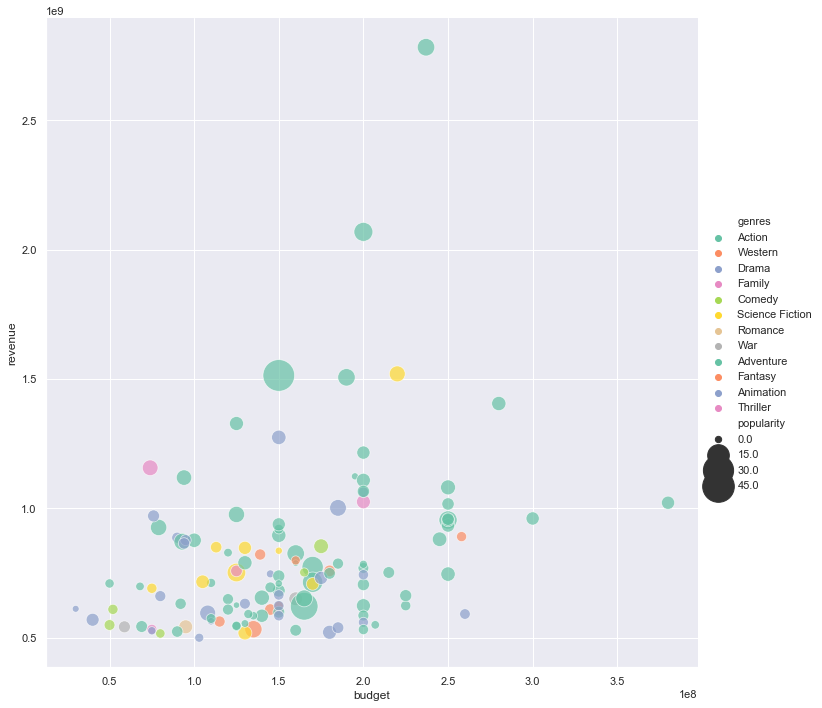

In [80]:
sns.relplot(x="budget", y="revenue", data= movies_top, size ="popularity", hue = 'genres', palette = 'Set2',alpha=.7,sizes=(40,1000),height=10)